# Project: House Price Prediction with Regression Techniques

###  Group Members: Aasmeen shaik, Mounika, Deepak Raj, Sajjad Ansari

# **Index**
  

*   Loading Dataset & Preprocessing
*   Exploratory Data Analysis & Visualizations


*   Regression Algorithms & Comparison









# Dataset Details:

**Link to the USA Real Estate Dataset:**
* https://www.kaggle.com/datasets/fatemedavar/usausausa

This dataset contains Real Estate listings in the US broken by twelve State and zip code

# 1. Importing Necessary Libraries:

In [147]:
 #Required Libraries.
import time
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

# 2. Loading the DataSet:



In [148]:
# Read the dataset
df = pd.read_csv('/content/sample_data/usausa.csv')
df

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0
...,...,...,...,...,...,...,...,...,...,...
99995,for_sale,3.0,3.0,NaN,Hudson,Massachusetts,1749.0,2864.0,NaN,749900.0
99996,for_sale,2.0,1.0,0.34,Auburn,Massachusetts,1501.0,1075.0,1999-06-07,349900.0
99997,for_sale,3.0,2.0,1.01,Shrewsbury,Massachusetts,1545.0,1632.0,1995-09-27,549000.0
99998,for_sale,3.0,2.0,0.12,Worcester,Massachusetts,1604.0,1332.0,2000-09-11,299000.0


# 3. Data Cleaning & Preprocessing:

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   status          100000 non-null  object 
 1   bed             75050 non-null   float64
 2   bath            75112 non-null   float64
 3   acre_lot        85987 non-null   float64
 4   city            99948 non-null   object 
 5   state           100000 non-null  object 
 6   zip_code        99805 non-null   float64
 7   house_size      75082 non-null   float64
 8   prev_sold_date  28745 non-null   object 
 9   price           100000 non-null  float64
dtypes: float64(6), object(4)
memory usage: 7.6+ MB


In [150]:
# List of all states.
unique_value = df['state'].unique()
print('List of states in USA Dataset\n')
print('List of states:', unique_value)

# Counting of states.
sum_state = len(unique_value)
print('\nTotal number of states:', sum_state)

List of states in USA Dataset

List of states: ['Puerto Rico' 'Virgin Islands' 'Massachusetts' 'Connecticut'
 'New Hampshire' 'Vermont' 'New Jersey' 'New York' 'South Carolina'
 'Tennessee' 'Rhode Island' 'Virginia']

Total number of states: 12


In [151]:
# Removing columns that do not need further analysis.
df = df.drop(['status', 'zip_code', 'prev_sold_date'], axis=1)
df

,bed,bath,acre_lot,city,state,house_size,price
0,3.0,2.0,0.12,Adjuntas,Puerto Rico,920.0,105000.0
1,4.0,2.0,0.08,Adjuntas,Puerto Rico,1527.0,80000.0
2,2.0,1.0,0.15,Juana Diaz,Puerto Rico,748.0,67000.0
3,4.0,2.0,0.10,Ponce,Puerto Rico,1800.0,145000.0
4,6.0,2.0,0.05,Mayaguez,Puerto Rico,NaN,65000.0
...,...,...,...,...,...,...,...
99995,3.0,3.0,NaN,Hudson,Massachusetts,2864.0,749900.0
99996,2.0,1.0,0.34,Auburn,Massachusetts,1075.0,349900.0
99997,3.0,2.0,1.01,Shrewsbury,Massachusetts,1632.0,549000.0
99998,3.0,2.0,0.12,Worcester,Massachusetts,1332.0,299000.0


In [152]:
# Rename a column 'acre_lot' into a column 'land_size(acres)'
df.rename(columns = {'acre_lot':'land_size(acres)'}, inplace=True)
df

,bed,bath,land_size(acres),city,state,house_size,price
0,3.0,2.0,0.12,Adjuntas,Puerto Rico,920.0,105000.0
1,4.0,2.0,0.08,Adjuntas,Puerto Rico,1527.0,80000.0
2,2.0,1.0,0.15,Juana Diaz,Puerto Rico,748.0,67000.0
3,4.0,2.0,0.10,Ponce,Puerto Rico,1800.0,145000.0
4,6.0,2.0,0.05,Mayaguez,Puerto Rico,NaN,65000.0
...,...,...,...,...,...,...,...
99995,3.0,3.0,NaN,Hudson,Massachusetts,2864.0,749900.0
99996,2.0,1.0,0.34,Auburn,Massachusetts,1075.0,349900.0
99997,3.0,2.0,1.01,Shrewsbury,Massachusetts,1632.0,549000.0
99998,3.0,2.0,0.12,Worcester,Massachusetts,1332.0,299000.0


In [153]:
# Checking duplicates in the dataset.
print('Number of duplicates :', df.duplicated().sum())
# Removing all duplicates in the dataset.
df.drop_duplicates(inplace=True)

# Checking duplicates after removed.
df.duplicated().sum()
print('Number of duplicates after removed:', df.duplicated().sum())
df.info()

Number of duplicates : 85401
Number of duplicates after removed: 0
<class 'pandas.core.frame.DataFrame'>
Index: 14599 entries, 0 to 97288
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   bed               11273 non-null  float64
 1   bath              11273 non-null  float64
 2   land_size(acres)  12766 non-null  float64
 3   city              14583 non-null  object 
 4   state             14599 non-null  object 
 5   house_size        11274 non-null  float64
 6   price             14599 non-null  float64
dtypes: float64(5), object(2)
memory usage: 912.4+ KB


In [154]:
# Checking a missing data.
print('Columns and missing data:')
df.isnull().sum()

Columns and missing data:


,0
bed,3326
bath,3326
land_size(acres),1833
city,16
state,0
house_size,3325
price,0


In [202]:
# Replace missing values.
df['bed'].fillna(df['bed'].median(), inplace=True)
df['bath'].fillna(df['bath'].median(), inplace=True)
df['house_size'].fillna(df['house_size'].median(), inplace=True)
df['land_size(acres)'].fillna(df['land_size(acres)'].median(), inplace=True)
df.dropna(subset=['city'], inplace=True)

# Checking missing values again.
df.isnull().sum()

,0
bed,0
bath,0
land_size(acres),0
city,0
state,0
house_size,0
price,0


In [157]:
# First five houses with the smallest price.
# We can see that houses price with the same house size don't have the same price.
df.nsmallest(5, 'price')

,bed,bath,land_size(acres),city,state,house_size,price
33851,3.0,2.0,0.50,Hinsdale,New Hampshire,1759.5,445.0
29835,3.0,2.0,0.31,Hubbardston,Massachusetts,1759.5,7900.0
28305,3.0,2.0,0.28,Becket,Massachusetts,1759.5,9500.0
28229,3.0,2.0,0.67,Florida,Massachusetts,1759.5,9900.0
28225,3.0,2.0,0.46,Florida,Massachusetts,1759.5,10000.0


In [203]:
# First five houses with the highest price.
# We can see that houses with the highest price don't have the largest land size.
df.nlargest(5, 'price')

,bed,bath,land_size(acres),city,state,house_size,price
40599,3.431952,5.589945,4.312112,1.613821,-1.003958,2.875447,1998
2791,-0.302939,-0.321988,3.923955,-0.340877,0.716982,-0.214416,1997
11799,-0.302939,-0.321988,4.349080,-1.169359,2.437921,-0.214416,1996
11292,-0.302939,-0.321988,4.059502,0.752977,2.437921,-0.214416,1995
11674,-0.302939,-0.321988,4.352160,-1.169359,2.437921,-0.214416,1994


In [159]:
# Grouping to 'state' and 'price'.
df_group = df.groupby(['state', 'price']).sum()
df_group

bed  bath  land_size(acres)                   city  \
state          price                                                            
Connecticut    14900.0     3.0   2.0              1.75               Stafford   
               16000.0     3.0   2.0              0.33                Windham   
               19900.0     6.0   4.0              2.64  South WindsorHartford   
               20000.0     3.0   2.0              1.00   South WindsorWindham   
               24900.0     4.0   3.0              0.68       SimsburyHartford   
...                        ...   ...               ...                    ...   
Virgin Islands 17500000.0  3.0   2.0           2377.00           Frederiksted   
               22500000.0  3.0   2.0            744.00          Christiansted   
               23000000.0  3.0   2.0            130.00           Saint Thomas   
               24500000.0  3.0   2.0            618.36          Christiansted   
Virginia       75000.0     3.0   2.0              0.50           Chincoteague   

                           house_size  
state          price                   
Connecticut    14900.0         1759.5  
               16000.0         1759.5  
               19900.0         3519.0  
               20000.0         1038.0  
               24900.0         2215.5  
...                               ...  
Virgin Islands 17500000.0      1759.5  
               22500000.0      1759.5  
               23000000.0      1759.5  
               24500000.0      1759.5  
Virginia       75000.0         1759.5  

[4330 rows x 5 columns]

#  **4. Exploratory Data Analysis & Visualizations:**

**House Prices in Top 10 States**

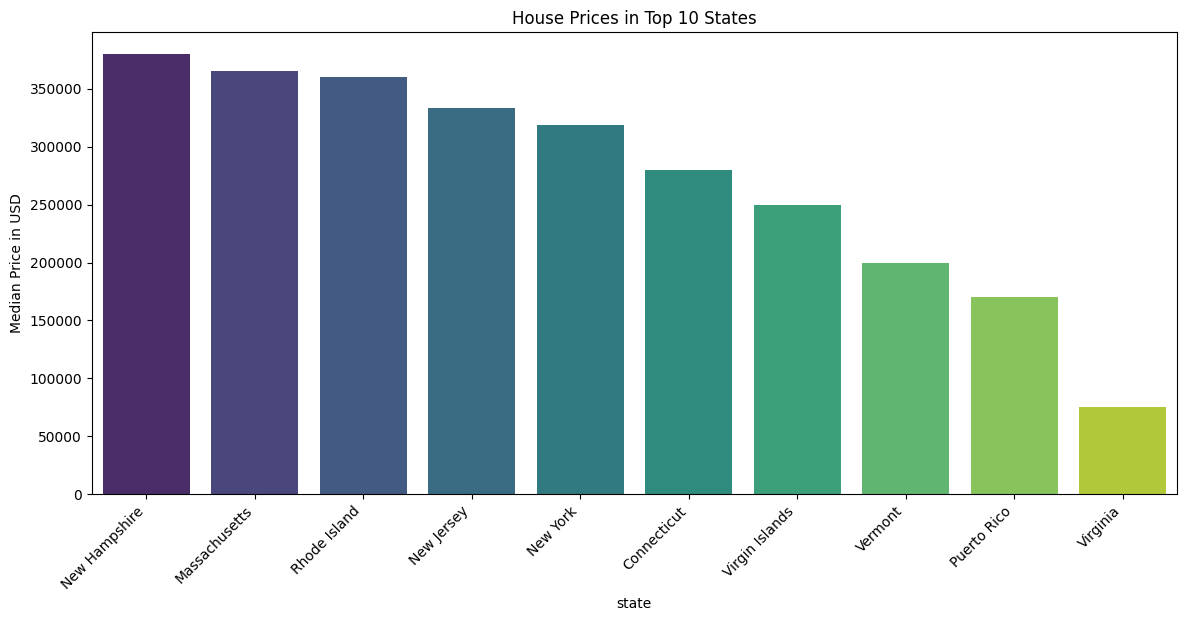

In [160]:
#Median prices for each state
median_prices = df.groupby('state')['price'].median().sort_values(ascending=False)

#Let's Pick the top 10 states
top_10_states = median_prices.head(10)

#Bar chart for the top 10 states
plt.figure(figsize=(14, 6))
sns.barplot(x=top_10_states.index, y=top_10_states.values, palette='viridis')
plt.title('House Prices in Top 10 States')
plt.xlabel('state')
plt.ylabel('Median Price in USD')
plt.xticks(rotation=45, ha='right')
plt.show()

First we find the median prices for each state, then selects the top 10 states based on median prices.

we can see 'New Hampshire' is the topmost state in accordance with the prices.

**Correlation HeatMap**

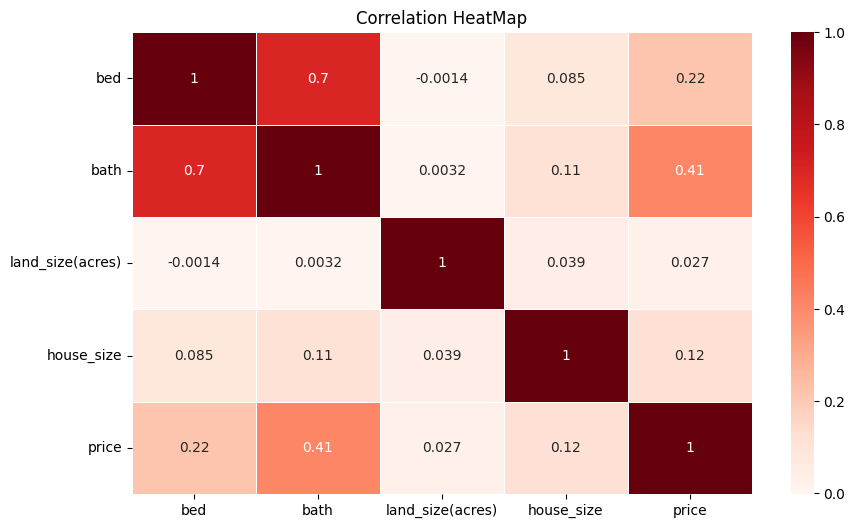

In [161]:

# Filter only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, linewidth=0.4, cmap='Reds')
plt.title('Correlation HeatMap')
plt.show()


1. In the above Visualization, We can see the correlation between all the columns.

2. Darker the colour in the map, stronger the correlation between the columns.

3. From the above Data Analysis, We can conclude the following things:-

'bed' and 'bath' have 0.7 correlation with eachother, that means they are highly correlated. So, the number of bathrooms in a house is correlated with number of bedrooms. Also, we can see that the correlation between bath and price is 0.4 that means, even the number of bathrooms will give the price fluctuations/predictions in the house.

**Pairwise Relationships with State as Hue**

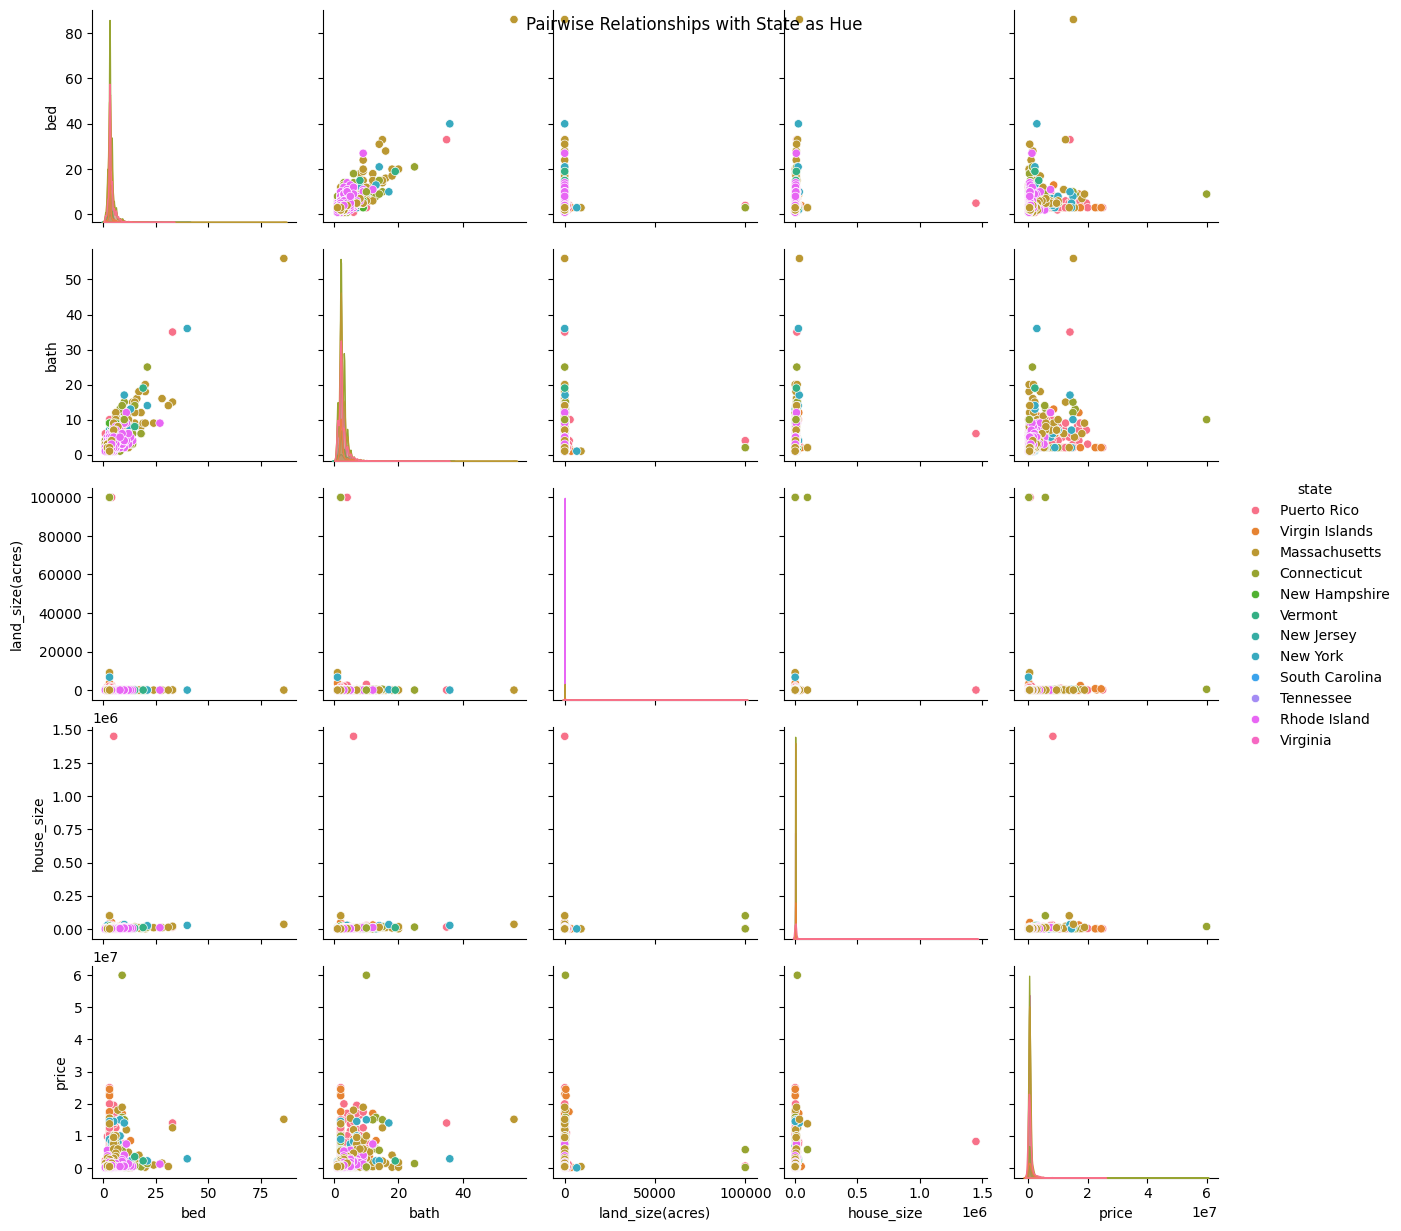

In [162]:
# Pair Plot with Hue for State
sns.pairplot(df, hue='state', palette='husl', markers='o')
plt.suptitle('Pairwise Relationships with State as Hue')
plt.show()

We can see the Pair plot with hue for the 'state' variable which helps to visually inspect how the pairwise relationships between other variables differ across different states.

**Relationship between State and price by combining them**

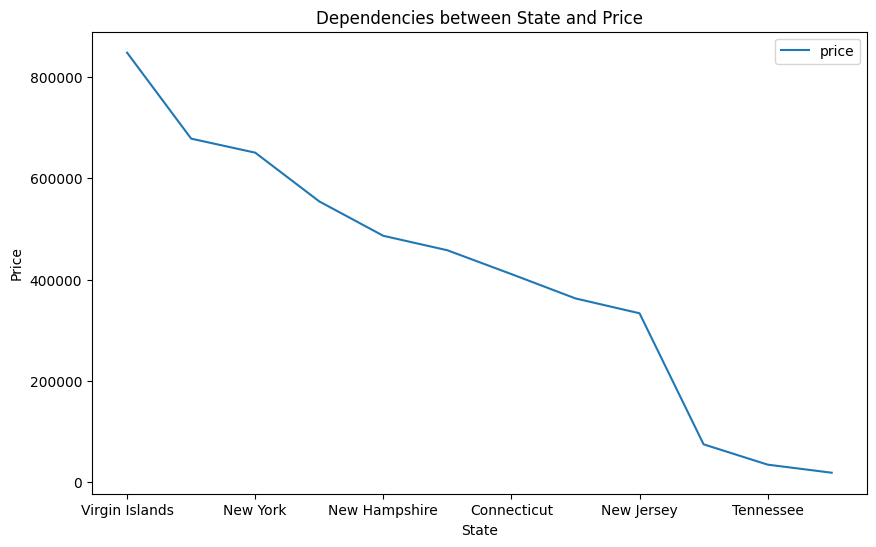

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Puerto Rico'),
  Text(1, 0, 'Virgin Islands'),
  Text(2, 0, 'Massachusetts'),
  Text(3, 0, 'Connecticut'),
  Text(4, 0, 'New Hampshire'),
  Text(5, 0, 'Vermont'),
  Text(6, 0, 'New Jersey'),
  Text(7, 0, 'New York'),
  Text(8, 0, 'South Carolina'),
  Text(9, 0, 'Tennessee'),
  Text(10, 0, 'Rhode Island'),
  Text(11, 0, 'Virginia')])

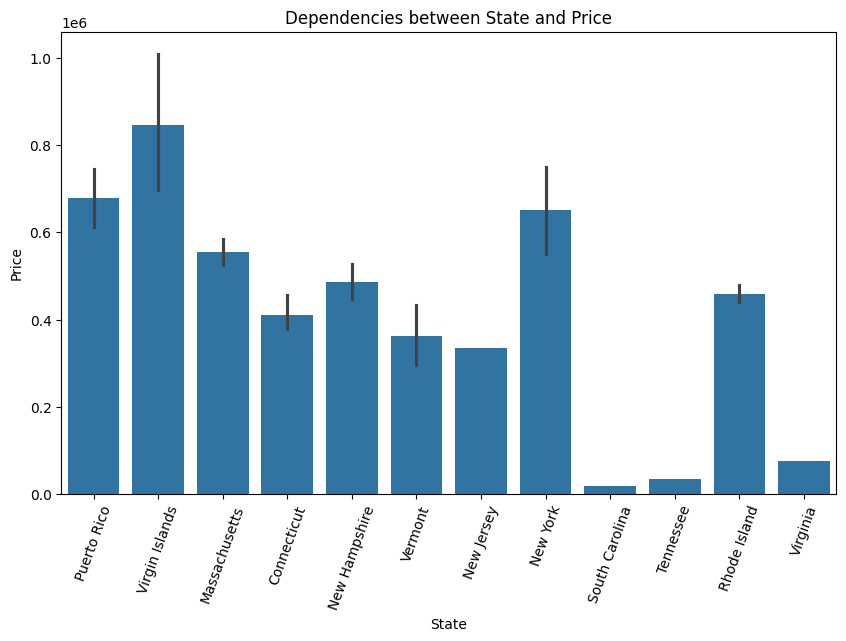

In [163]:
#relationship between State and price by combining them
plot = df.pivot_table(
    index=['state'], values='price').sort_values('price', ascending=False)
plot.plot(figsize=(10, 6))
plt.title('Dependencies between State and Price')
plt.xlabel('State')
plt.ylabel('Price')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='state', y='price')
plt.title('Dependencies between State and Price')
plt.xlabel('State')
plt.ylabel('Price')
plt.xticks(rotation=70)

The Line plot and Bar plot provides how average prices vary across different states.

We can observe here 'VIRGIN ISLANDS' have higher average house prices and 'SOUTH CAROLINA' have lower average house prices.

**Top 20 Highest average of Price by Cities**

[Text(-90, 0, '4765654.0 USD')]

<Figure size 2500x900 with 0 Axes>

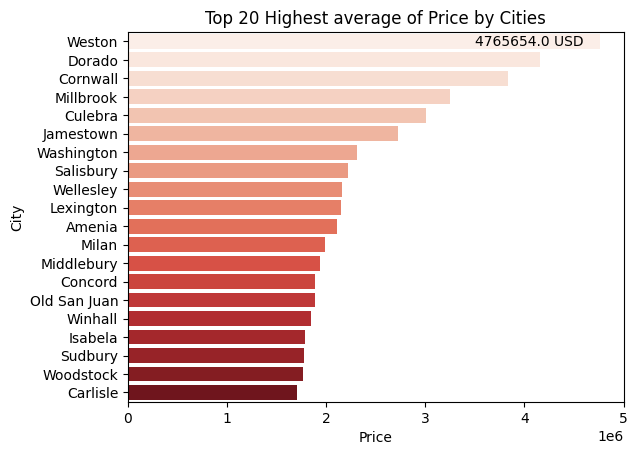

In [164]:
#Highest average of prices by cities.
city_avg_high_price = \
    df['price'].groupby(df['city']).mean().round(0).nlargest(20).sort_values(ascending=False).reset_index()

#Subplot
plt.figure(figsize=(25,9))
fig, ax = plt.subplots()
ax = sns.barplot(ax=ax, data=city_avg_high_price, y=city_avg_high_price.city, x=city_avg_high_price.price, palette='Reds')
ax.set(ylabel='City', xlabel='Price', title='Top 20 Highest average of Price by Cities')
ax.bar_label(ax.containers[0],
             padding = -90, color='Black', fontsize=10, label_type='edge', fmt='%.1f USD')

From the above visualization, we can conclude that 'Weston' is the Topmost city to have Highest Average Price.

**Top 20 Lowest average of Price by Cities**

[Text(-67, 0, '99999.0 USD')]

<Figure size 2500x900 with 0 Axes>

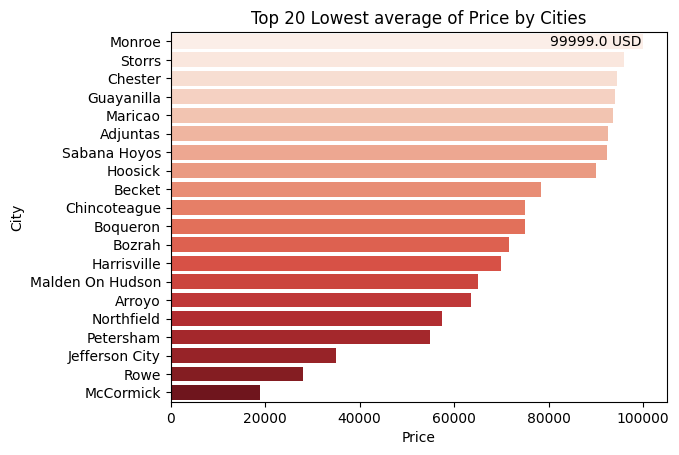

In [165]:
#The lowest average of prices by cities
city_low_price = \
    df['price'].groupby(df['city']).mean().round(0).nsmallest(20).sort_values(ascending = False).reset_index()

#subplot
plt.figure(figsize=(25,9))
fig, ax = plt.subplots()
ax = sns.barplot(ax=ax, data=city_low_price , y=city_low_price.city, x=city_low_price.price, palette= 'Reds')
ax.set(ylabel='City', xlabel='Price', title='Top 20 Lowest average of Price by Cities')
ax.bar_label(ax.containers[0],
             padding = -67, color='Black', fontsize=10, label_type='edge', fmt='%.1f USD')

From the above visualization, we can conclude that 'Monroe' is the Topmost city to have Lowest Average Price.

# 5. Transforming and standardizing the data:

In [166]:
# Transforming data with the LabelEncoder and converting categorical columns into numerical ones into integers to fit into the model
label_encode = LabelEncoder()
df['city'] = label_encode.fit_transform(df['city'])
df['state'] = label_encode.fit_transform(df['state'])
df['bed'] = label_encode.fit_transform(df['bed'])
df['bath'] = label_encode.fit_transform(df['bath'])
df['land_size(acres)'] = label_encode.fit_transform(df['land_size(acres)'])
df['house_size'] = label_encode.fit_transform(df['house_size'])
df['price'] = label_encode.fit_transform(df['price'])

<Axes: >

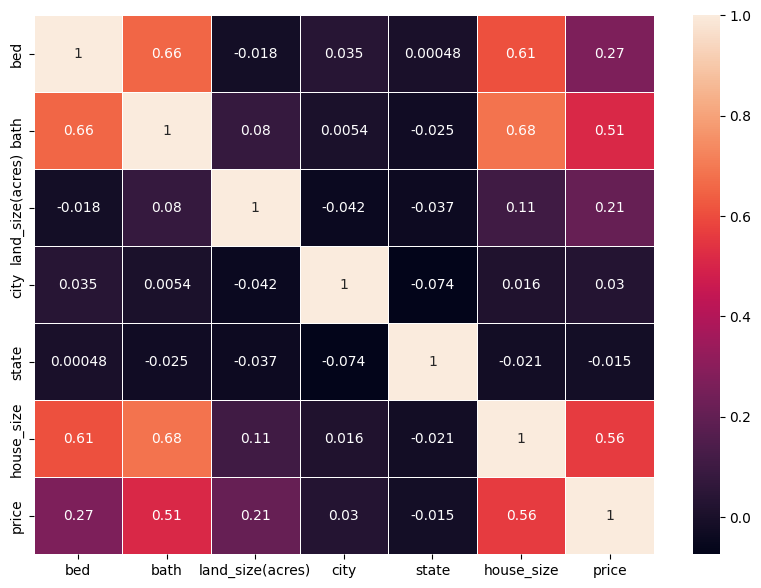

In [167]:
# Visualisation correlation after transformation
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(), annot=True, linewidth=.4)

In [168]:
# Data set standardization for removing the mean and scales each feature/variable to unit variance.
df['house_size'] = \
    StandardScaler().fit_transform(df['house_size'].values.reshape(len(df), 1))

'''I have commented 'price' to display it more understandable how price has changed
as 836.9, and not as -0.017321.
This is more understandable how price has changed.'''

# df_usapp_new['price'] = \
#     StandardScaler().fit_transform(df_usapp_new['price'].values.reshape(len(df_usapp_new), 1))

df['bed'] = \
    StandardScaler().fit_transform(df['bed'].values.reshape(len(df), 1))
df['bath'] = \
    StandardScaler().fit_transform(df['bath'].values.reshape(len(df), 1))
df['land_size(acres)'] = \
    StandardScaler().fit_transform(df['land_size(acres)'].values.reshape(len(df), 1))
df['city'] = \
    StandardScaler().fit_transform(df['city'].values.reshape(len(df), 1))
df['state'] = \
    StandardScaler().fit_transform(df['state'].values.reshape(len(df), 1))

# 6. Splitting train and test data:


In [169]:
# Split the dataset into X, y values.
# price being the dependent variable andrest independent variables.
X = df.drop(['price'], axis=1)

# Target values.
y = df['price']

# Making a train and a test dataset.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 7. Implementing Regression Algorithms & Checking the Accuracy:



a. Linear Regression


b. Decision Tree


c. Random Forest

d. Gradient Boosting







## a. Linear Regression:

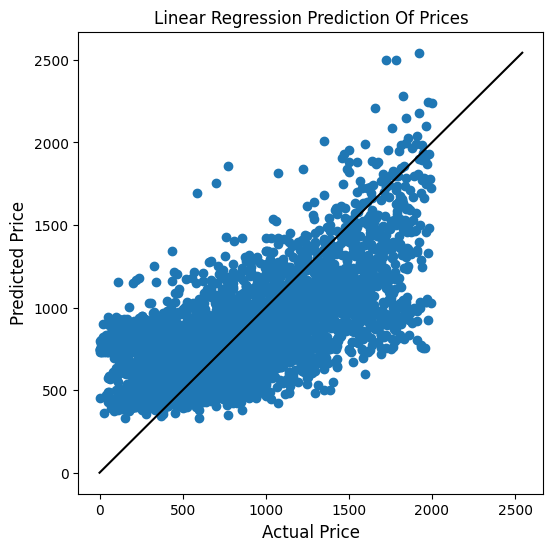

In [170]:
# create a Linear Regression model
lm = LinearRegression().fit(X_train, y_train)
# Get the prediction.
y_pred_linearRegression = lm.predict(X_test)

# Visualization of the prediction.
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_linearRegression)
plt.yscale("linear")
plt.xscale('linear')

# Make lines of the plot.
line_1 = max(max(y_pred_linearRegression), max(y_test))
line_2 = min(min(y_pred_linearRegression), min(y_test))
plt.plot([line_1, line_2], [line_1, line_2], 'k')
plt.title('Linear Regression Prediction Of Prices')
plt.xlabel('Actual Price', fontsize=12)
plt.ylabel('Predicted Price', fontsize=12)
plt.show()

<Axes: title={'center': 'Data Distribution of Linear Regression'}, xlabel='price', ylabel='Density'>

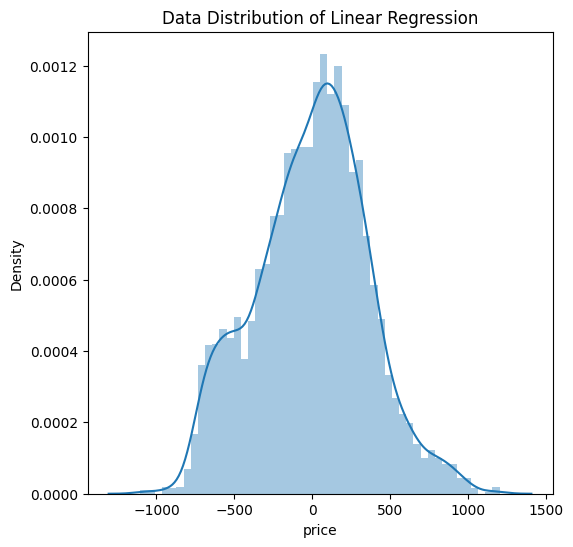

In [171]:
# Predicted data Distribution of Linear Regression.
plt.figure(figsize=(6, 6))
plt.title('Data Distribution of Linear Regression')
sns.distplot((y_test - y_pred_linearRegression), bins=50)

### Accuracy of Linear Regression:

In [172]:
# check if the model is overfitting or untrained.
print('If Training Accuracy will show more than 0.98 - the model is overfitting.')
print('If Training Accuracy will show less than 0.60 – the model is untrained.\n')

# check if the model is overfitting to the training data.
train_accur_1 = r2_score(y_train, lm.predict(X_train))


# Check for accuracy.
if train_accur_1 > 0.98:
  print('Oops! Model is overfitting.')
  print(f'Training Accuracy is {train_accur_1:.4f}')
  print('-------' * 5)
elif train_accur_1 < 0.60:
  print('Oops! Model is untrained.')
  print(f'Training Accuracy is {train_accur_1:.2f}')
  print('-------' * 5)
else:
  print(f'Training Accuracy is {train_accur_1:.2f}')


# SHOW THE MODEL ACCURACY:

# r2_score function.
print(f'Model Accuracy [r2_score] is {r2_score(y_test, lm.predict(X_test)):.2f}')

# Score function.
LMScore = lm.score(X_test, y_test)
print(f'Model Accuracy [score] is {LMScore:.2f}\n')

If Training Accuracy will show more than 0.98 - the model is overfitting.
If Training Accuracy will show less than 0.60 – the model is untrained.

Oops! Model is untrained.
Training Accuracy is 0.40
-----------------------------------
Model Accuracy [r2_score] is 0.38
Model Accuracy [score] is 0.38



In [173]:
# Error block.
print('--- Errors of Linear Regression ---\n')

# Mean Squared Error.
mse_linearRegression = mean_squared_error(y_test, y_pred_linearRegression)
print(f'Mean Squared Error: {mse_linearRegression:.2f}')

# Root Mean Squared Error.
rmse_linearRegression = mean_squared_error(y_test, y_pred_linearRegression, squared=False)
print(f'Root Mean Squared Error: {rmse_linearRegression:.2f}')

--- Errors of Linear Regression ---

Mean Squared Error: 132048.24
Root Mean Squared Error: 363.38


In [174]:
# Compare the actual prices from test data with the predicted prices.
result = X_test
result['actual_price'] = y_test

# Add a new column 'y_pred_lin'.
result['predicted_price'] = y_pred_linearRegression.tolist()

# Show a table with a real and predict price to compare.
print('--- Prediction by Linear Regression ---\n')
result.head()

--- Prediction by Linear Regression ---



,bed,bath,land_size(acres),city,state,house_size,actual_price,predicted_price
57308,-0.302939,0.417003,-0.262593,1.354921,-1.003958,-0.528832,805,836.989789
94625,-0.302939,0.417003,-0.542928,1.335503,1.061170,-0.400035,1041,858.813452
11271,-0.302939,-0.321988,-0.339608,0.752977,2.437921,-0.214416,554,790.003965
14112,-0.302939,-0.321988,-0.327286,0.746505,2.437921,-0.214416,1519,790.600429
28222,-0.302939,-0.321988,3.880827,0.720615,-0.659770,-0.214416,720,1014.312733


## b. Decision Tree Regression:





In [176]:
# Split the dataset into X, y values.
# price being the dependent variable andrest independent variables
X = df.drop(['price'], axis=1)

# Target values.
y = df['price']

# Make a train and a test dataset.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [177]:
# Create the Decision Tree Regressor model and fitting data.
decisionTree_model = DecisionTreeRegressor().fit(X_train, y_train)

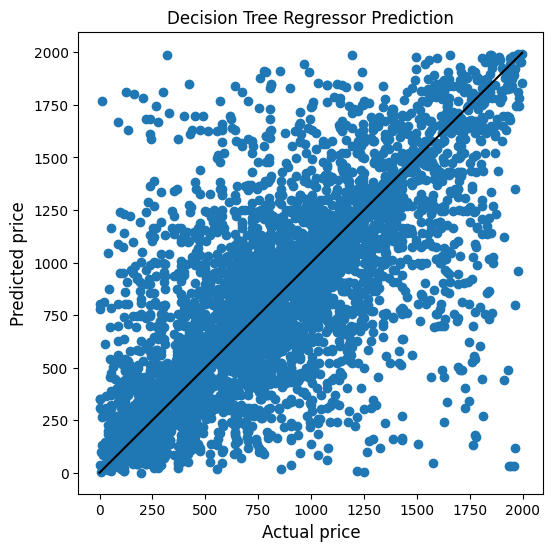

In [178]:
# Get prediction.
y_pred_decisionTree = decisionTree_model.predict(X_test)

# VISUALIZATION OF PREDICTION.

# Plot with a Linear axes scales.
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_decisionTree)
plt.yscale("linear")
plt.xscale('linear')

# Making lines of the plot.
line_1 = max(max(y_pred_decisionTree), max(y_test))
line_2 = min(min(y_pred_decisionTree), min(y_test))
plt.plot([line_1, line_2], [line_1, line_2], 'k')
plt.title('Decision Tree Regressor Prediction')
plt.xlabel('Actual price', fontsize=12)
plt.ylabel('Predicted price', fontsize=12)
plt.show()

<Axes: title={'center': 'Price Distribution of Decision Tree Regressor'}, xlabel='price', ylabel='Density'>

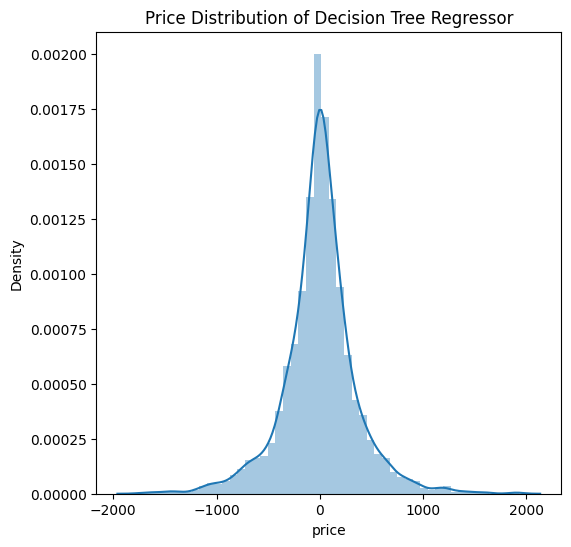

In [179]:
# Predicted data Distribution of Decision Tree Regressor.
plt.figure(figsize=(6, 6))
plt.title('Price Distribution of Decision Tree Regressor')
sns.distplot((y_test - y_pred_decisionTree), bins=50)

### Accuracy of Decision Tree:

In [181]:
# check if the model is overfitting.
print('If Training Accuracy will show more than 0.98 - the model is overfitting.')
print('If Training Accuracy will show less than 0.60 – the model is untrained.\n')

# check if the model is overfitting to the training data.
train_accur_2 = r2_score(y_train, decisionTree_model.predict(X_train))


# Checking of accuracy.
if train_accur_2 > 0.98:
  print('Oops! Model is overfitting.')
  print(f'Training Accuracy is {train_accur_2:.4f}')
  print('-------' * 5)
elif train_accur_2 < 0.60:
  print('Oops! Model is untrained.')
  print(f'Training Accuracy is {train_accur_2:.2f}')
  print('-------' * 5)
else:
  print(f'Training Accuracy is {train_accur_2:.2f}')


# SHOW THE MODEL ACCURACY:

# r2_score function.
print(f'Model Accuracy [r2_score] is {r2_score(y_test, decisionTree_model.predict(X_test)):.2f}')

# Score function.
DTScore = decisionTree_model.score(X_test, y_test)
print(f'Model Accuracy [score] is {DTScore:.2f}\n')

If Training Accuracy will show more than 0.98 - the model is overfitting.
If Training Accuracy will show less than 0.60 – the model is untrained.

Oops! Model is overfitting.
Training Accuracy is 0.9944
-----------------------------------
Model Accuracy [r2_score] is 0.39
Model Accuracy [score] is 0.39



In [182]:
# Comparing the actual prices from test data with predicted prices.
result = X_test
result['actual_price'] = y_test

# Add a new column 'y_pred_decisionTree'.
result['predicted_price'] = y_pred_decisionTree.tolist()

# Show a table with a real and predict price to comparison.
print('--- Prediction by Decision Tree Regressor ---\n')
result.head()

--- Prediction by Decision Tree Regressor ---



,bed,bath,land_size(acres),city,state,house_size,actual_price,predicted_price
57308,-0.302939,0.417003,-0.262593,1.354921,-1.003958,-0.528832,805,1274.0
94625,-0.302939,0.417003,-0.542928,1.335503,1.061170,-0.400035,1041,999.0
11271,-0.302939,-0.321988,-0.339608,0.752977,2.437921,-0.214416,554,19.0
14112,-0.302939,-0.321988,-0.327286,0.746505,2.437921,-0.214416,1519,1257.0
28222,-0.302939,-0.321988,3.880827,0.720615,-0.659770,-0.214416,720,1578.0




## c. Random Forest Regression:

In [183]:
# Split the dataset into X, y values.
# price being the dependent variable andrest independent variables
X = df.drop(['price'], axis=1)

# Target values.
y = df['price']

# Making a train and a test dataset.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [185]:
# Create the Random Forest Regressor model and fitting data.
RFR = RandomForestRegressor().fit(X_train, y_train)

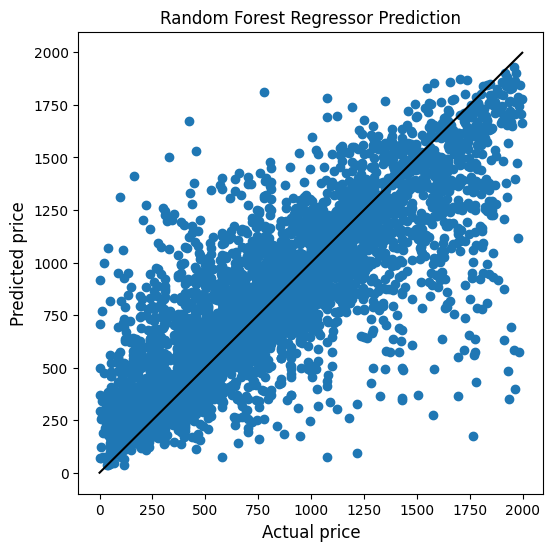

In [186]:
# Get prediction.
y_pred_RFR = RFR.predict(X_test)

# Visualization of prediction.

# Plot with a Linear axes scales.
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_RFR)
plt.yscale("linear")
plt.xscale('linear')

# Make lines of the plot.
line_1 = max(max(y_pred_RFR), max(y_test))
line_2 = min(min(y_pred_RFR), min(y_test))
plt.plot([line_1, line_2], [line_1, line_2], 'k')
plt.title('Random Forest Regressor Prediction')
plt.xlabel('Actual price', fontsize=12)
plt.ylabel('Predicted price', fontsize=12)
plt.show()

<Axes: title={'center': 'Price Distribution of Random Forest Regressor'}, xlabel='price', ylabel='Density'>

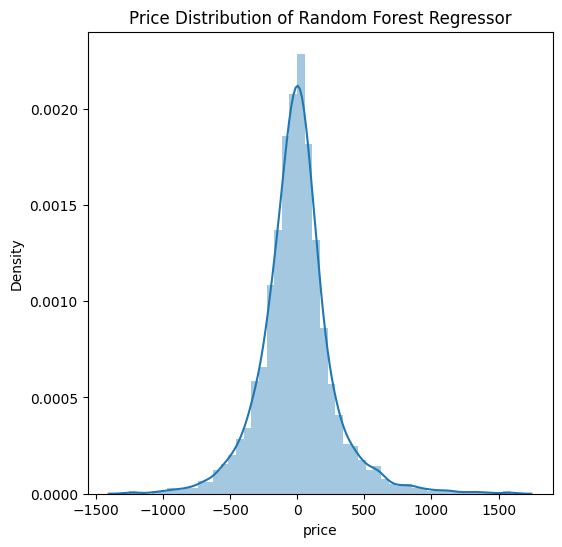

In [187]:
# Distribution of Random Forest Regressor.
plt.figure(figsize=(6, 6))
plt.title('Price Distribution of Random Forest Regressor')
sns.distplot((y_test - y_pred_RFR), bins=50)

### Accuracy of Random Forest:

In [188]:
# check if the model is overfitting.
print('If Training Accuracy will show more than 0.98 - the model is overfitting.')
print('If Training Accuracy will show less than 0.60 – the model is untrained.\n')

# check if the model is overfitting to the training data.
train_accur_3 = r2_score(y_train, RFR.predict(X_train))


# Check for accuracy.
if train_accur_3 > 0.98:
  print('Oops! Model is overfitting.')
  print(f'Training Accuracy is {train_accur_3:.4f}')
  print('-------' * 5)
elif train_accur_3 < 0.60:
  print('Oops! Model is untrained.')
  print(f'Training Accuracy is {train_accur_3:.2f}')
  print('-------' * 5)
else:
  print(f'Training Accuracy is {train_accur_3:.2f}')


# SHOW THE MODEL ACCURACY:

# r2_score function.
print(f'Model Accuracy [r2_score] is {r2_score(y_test, RFR.predict(X_test)):.2f}')

# Score function.
RFRScore = RFR.score(X_test, y_test)
print(f'Model Accuracy [score] is {RFRScore:.2f}\n')

If Training Accuracy will show more than 0.98 - the model is overfitting.
If Training Accuracy will show less than 0.60 – the model is untrained.

Training Accuracy is 0.95
Model Accuracy [r2_score] is 0.65
Model Accuracy [score] is 0.65



In [189]:
# Error block.
print('--- Errors of Random Forest Regressor ---\n')

# Mean Squared Error.
mse_RFR = mean_squared_error(y_test, y_pred_RFR)
print(f'Mean Squared Error: {mse_RFR:.2f}')

# Root Mean Squared Error.
rmse_RFR = mean_squared_error(y_test, y_pred_RFR, squared=False)
print(f'Root Mean Squared Error: {rmse_RFR:.2f}')

--- Errors of Random Forest Regressor ---

Mean Squared Error: 74434.56
Root Mean Squared Error: 272.83


In [190]:
# Comparing the actual prices from test data with predicted prices.
result = X_test
result['actual_price'] = y_test

# Added a new column 'y_pred_forest'.
result['predicted_price'] = y_pred_RFR.tolist()

# Show a table with a real and predict price to comparison.
print('--- Prediction by Random Forest Regressor ---\n')
result.head()

--- Prediction by Random Forest Regressor ---



,bed,bath,land_size(acres),city,state,house_size,actual_price,predicted_price
57308,-0.302939,0.417003,-0.262593,1.354921,-1.003958,-0.528832,805,914.820
94625,-0.302939,0.417003,-0.542928,1.335503,1.061170,-0.400035,1041,956.970
11271,-0.302939,-0.321988,-0.339608,0.752977,2.437921,-0.214416,554,551.296
14112,-0.302939,-0.321988,-0.327286,0.746505,2.437921,-0.214416,1519,1191.517
28222,-0.302939,-0.321988,3.880827,0.720615,-0.659770,-0.214416,720,1194.300



## d. Gradient Boosting Regression:

In [207]:
# Split the dataset into X, y values.
# price being the dependent variable andrest independent variables
X = df.drop(['price'], axis=1)

# Target values.
y = df['price']

# Making a train and a test dataset.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [208]:
# Creating Gradient Boosting Regression and fitting data.
GBR = GradientBoostingRegressor().fit(X_train, y_train)

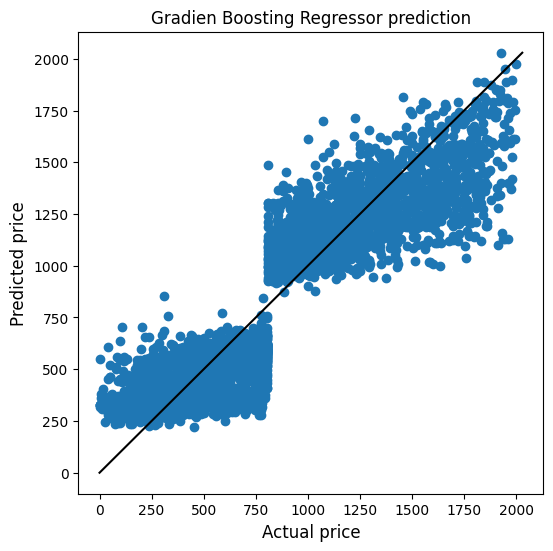

In [209]:
# Get prediction.
y_pred_GBR = GBR.predict(X_test)

# Visualization of prediction.
# Plot with a Linear axes scales.
plt.figure(figsize= (6, 6))
plt.scatter(y_test, y_pred_GBR)
plt.yscale("linear")
plt.xscale('linear')

# Making lines of the plot.
line_1 = max(max(y_pred_GBR), max(y_test))
line_2 = min(min(y_pred_GBR), min(y_test))
plt.plot([line_1, line_2], [line_1, line_2], 'k')
plt.title('Gradien Boosting Regressor prediction')
plt.xlabel('Actual price', fontsize=12)
plt.ylabel('Predicted price', fontsize=12)
plt.show()

<Axes: title={'center': 'Price Distribution of Gradient Boosting Regressor'}, xlabel='price', ylabel='Density'>

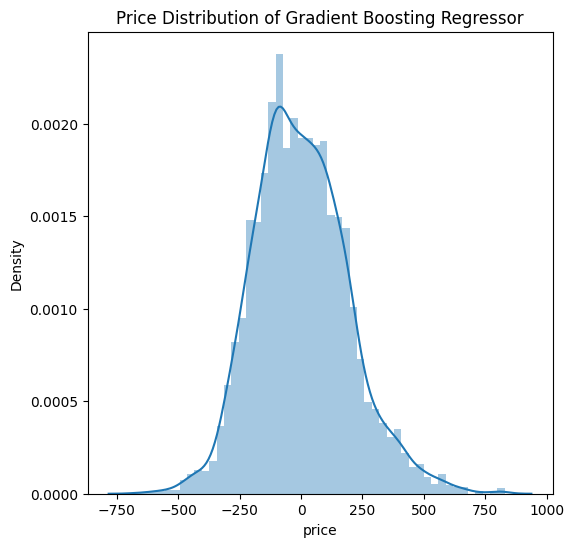

In [210]:
# Distribution of Gradient Boosting Regressor.
plt.figure(figsize=(6,6))
plt.title('Price Distribution of Gradient Boosting Regressor')
sns.distplot((y_test - y_pred_GBR), bins=50)

### Accuracy of Gradient Boosting:







In [211]:
# check if the model is overfitting.
print('If Training Accuracy will show more than 0.98 - the model is overfitting.')
print('If Training Accuracy will show less than 0.60 – the model is untrained.\n')

# check if the model is overfitting to the training data.
train_accur_4 = r2_score(y_train, GBR.predict(X_train))


# Check for accuracy.
if train_accur_4 > 0.98:
  print('Oops! Model is overfitting')
  print(f'Training Accuracy is {train_accur_4:.4f}')
  print('-------' * 5)
elif train_accur_4 < 0.60:
  print('Oops! Model is untrained.')
  print(f'Training Accuracy is {train_accur_4:.2f}')
  print('-------' * 5)
else:
  print(f'Training Accuracy is {train_accur_4:.2f}')


# SHOW THE MODEL ACCURACY:

# r2_score function.
print(f'Model Accuracy [r2_score] is {r2_score(y_test, y_pred_GBR):.2f}')

# Score function
GBRScore = GBR.score(X_test, y_test)
print(f'Model Accuracy [score] is {GBRScore:.2f}\n')

If Training Accuracy will show more than 0.98 - the model is overfitting.
If Training Accuracy will show less than 0.60 – the model is untrained.

Training Accuracy is 0.84
Model Accuracy [r2_score] is 0.83
Model Accuracy [score] is 0.83



In [212]:
# Error block.
print('--- Errors of Gradient Boosting Regressor ---\n')

# Mean Squared Error.
mse_GBR = mean_squared_error(y_test, y_pred_GBR)
print(f'Mean Squared Error: {mse_GBR:.2f}')

# Root Mean Squared Error.
rmse_GBR = mean_squared_error(y_test, y_pred_GBR, squared=False)
print(f'Root Mean Squared Error: {rmse_GBR:.2f}')

--- Errors of Gradient Boosting Regressor ---

Mean Squared Error: 37246.44
Root Mean Squared Error: 192.99


In [213]:
# Compare the actual prices from test data with predicted prices.
result = X_test
result['actual_price'] = y_test

# Add a new column 'y_pred_GBreg'.
result['predicted_price'] = y_pred_GBR.tolist()

# Show a table with a real and predict price to comparison.
print('--- Prediction by Gradient Boosting Regressor ---\n')
result.head()

--- Prediction by Gradient Boosting Regressor ---



,bed,bath,land_size(acres),city,state,house_size,price_binary,actual_price,predicted_price
57308,-0.302939,0.417003,-0.262593,1.354921,-1.003958,-0.528832,0,805,662.623427
94625,-0.302939,0.417003,-0.542928,1.335503,1.061170,-0.400035,1,1041,1021.809664
11271,-0.302939,-0.321988,-0.339608,0.752977,2.437921,-0.214416,0,554,411.561917
14112,-0.302939,-0.321988,-0.327286,0.746505,2.437921,-0.214416,1,1519,1191.811436
28222,-0.302939,-0.321988,3.880827,0.720615,-0.659770,-0.214416,0,720,539.770855


## Comparison of Regression Algorithms:

In [197]:
# Initialize data of lists with scores.
data_1 = {'Scores': [f'{LMScore:.2f}',
                     f'{DTScore:.2f}',
                     f'{RFRScore:.2f}',
                     f'{GBRScore:.2f}',]}

# Creates pandas DataFrame.
df_compare_1 = pd.DataFrame(data_1,
                            index=['Linear Regression',
                                   'Decision Tree Regressor',
                                   'Random Forest Regressor',
                                   'Gradient Boosting Regressor'])

print('--- Comparison of single algorithms ---\n')
df_compare_1

--- Comparison of single algorithms ---



,Scores
Linear Regression,0.38
Decision Tree Regressor,0.39
Random Forest Regressor,0.65
Gradient Boosting Regressor,0.62


from matplotlib import pyplot as plt
import seaborn as sns
df_compare_1.groupby('Scores').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [198]:
pip install ydata-profiling

In [199]:
import pandas as pd
from ydata_profiling import ProfileReport
data = pd.read_csv('/content/sample_data/usausa.csv')



In [200]:
Profile = ProfileReport(data,title='House Prediction using Regression Techniques')

In [201]:
Profile.to_file("EDA_Report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]